# TP 1 PROTEOMIQUE : ANALYSE DONNEES SHOTGUN
## Auteure : Anissa EL MARRAHI, 5BIM

In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from xml.etree.ElementTree import parse, dump
import pandas as pd

In [30]:
tcl = pd.read_csv("./data/TCL_wt1.tsv",sep = '\t')
headers = tcl.columns 

for h in headers :
    #tcl =  tcl[tcl[h] != '#VALEUR!']
    tcl.drop(tcl.index[tcl[h] == '#VALEUR!'], inplace = True)
tcl = tcl.dropna()
tcl["Corrected Abundance ratio (1.53)"] = tcl["Corrected Abundance ratio (1.53)"].astype(float)
tcl["Log2 Corrected Abundance Ratio"] = tcl["Log2 Corrected Abundance Ratio"].astype(float)
tcl["Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)"] = tcl["Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)"].astype(float)
tcl["-LOG10 Adj.P-val"] = tcl["-LOG10 Adj.P-val"].astype(float)
print(tcl)

     Accession                                        Description Gene Symbol  \
0       P75936  Basal-body rod modification protein FlgD OS=Es...        flgD   
1       P76231  Uncharacterized protein YeaC OS=Escherichia co...        yeaC   
2       P0A8S9  Flagellar transcriptional regulator FlhD OS=Es...        flhD   
4       P05706  PTS system glucitol/sorbitol-specific EIIA com...        srlB   
5       P29744  Flagellar hook-associated protein 3 OS=Escheri...        flgL   
...        ...                                                ...         ...   
2011    P77330  Prophage lipoprotein Bor homolog OS=Escherichi...        borD   
2016    P02930  Outer membrane protein TolC OS=Escherichia col...        tolC   
2020    P0A917  Outer membrane protein X OS=Escherichia coli (...        ompX   
2021    P02931  Outer membrane protein F OS=Escherichia coli (...        ompF   
2022    P0AB40  Multiple stress resistance protein BhsA OS=Esc...        bhsA   

      Corrected Abundance r

/home/anissa/.local/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [15]:
from xml.etree.ElementTree import parse, dump
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
dump(proteins[0])


<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" created="1989-10-01" dataset="Swiss-Prot" modified="2020-08-12" version="166">
<ns0:accession>P11446</ns0:accession>
<ns0:accession>Q2M8Q3</ns0:accession>
<ns0:name>ARGC_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName evidence="1 4">N-acetyl-gamma-glutamyl-phosphate reductase</ns0:fullName>
<ns0:shortName evidence="1 4">AGPR</ns0:shortName>
<ns0:ecNumber evidence="1 2">1.2.1.38</ns0:ecNumber>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName evidence="1 3">N-acetyl-glutamate semialdehyde dehydrogenase</ns0:fullName>
<ns0:shortName evidence="1 3">NAGSA dehydrogenase</ns0:shortName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name evidence="1" type="primary">argC</ns0:name>
<ns0:name type="ordered locus">b3958</ns0:name>
<ns0:name type="ordered locus">JW3930</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference id="83333" type="NCBI

</ns0:dbReference>
<ns0:dbReference id="UP000000625" type="Proteomes">
<ns0:property type="component" value="Chromosome" />
</ns0:dbReference>
<ns0:dbReference id="GO:0005737" type="GO">
<ns0:property type="term" value="C:cytoplasm" />
<ns0:property type="evidence" value="ECO:0000501" />
<ns0:property type="project" value="UniProtKB-SubCell" />
</ns0:dbReference>
<ns0:dbReference id="GO:0003942" type="GO">
<ns0:property type="term" value="F:N-acetyl-gamma-glutamyl-phosphate reductase activity" />
<ns0:property type="evidence" value="ECO:0000314" />
<ns0:property type="project" value="EcoCyc" />
</ns0:dbReference>
<ns0:dbReference id="GO:0051287" type="GO">
<ns0:property type="term" value="F:NAD binding" />
<ns0:property type="evidence" value="ECO:0000501" />
<ns0:property type="project" value="InterPro" />
</ns0:dbReference>
<ns0:dbReference id="GO:0046983" type="GO">
<ns0:property type="term" value="F:protein dimerization activity" />
<ns0:property type="evidence" value="ECO:0000501" 

In [16]:
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P31224":
            dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" created="1993-07-01" dataset="Swiss-Prot" modified="2020-08-12" version="187">
<ns0:accession>P31224</ns0:accession>
<ns0:accession>Q2MBW5</ns0:accession>
<ns0:name>ACRB_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>AcrAB-TolC multidrug efflux pump subunit AcrB</ns0:fullName>
</ns0:alternativeName>
<ns0:alternativeName>
<ns0:fullName>Acridine resistance protein B</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">acrB</ns0:name>
<ns0:name type="synonym">acrE</ns0:name>
<ns0:name type="ordered locus">b0462</ns0:name>
<ns0:name type="ordered locus">JW0451</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference id="83333" type="NCBI Taxonomy" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteo

<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.80" />
<ns0:property type="chains" value="A/B/C=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="2DR6" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.30" />
<ns0:property type="chains" value="A/B/C=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="2DRD" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.10" />
<ns0:property type="chains" value="A/B/C=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="2GIF" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="2.90" />
<ns0:property type="chains" value="A/B/C=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="2HQC" type="PDB">
<ns0:property type="method" value="X-ray" />
<ns0:property type="resolution" value="3.56" />
<ns0:property type="chains" value="A=1-1049" />
</ns0:dbReference>
<ns0:dbReference id="2HQD" t

<ns0:property type="evidence" value="ECO:0000314" />
<ns0:property type="project" value="EcoCyc" />
</ns0:dbReference>
<ns0:dbReference id="GO:0015562" type="GO">
<ns0:property type="term" value="F:efflux transmembrane transporter activity" />
<ns0:property type="evidence" value="ECO:0000501" />
<ns0:property type="project" value="InterPro" />
</ns0:dbReference>
<ns0:dbReference id="GO:0042802" type="GO">
<ns0:property type="term" value="F:identical protein binding" />
<ns0:property type="evidence" value="ECO:0000353" />
<ns0:property type="project" value="IntAct" />
</ns0:dbReference>
<ns0:dbReference id="GO:0042908" type="GO">
<ns0:property type="term" value="P:xenobiotic transport" />
<ns0:property type="evidence" value="ECO:0000501" />
<ns0:property type="project" value="InterPro" />
</ns0:dbReference>
<ns0:dbReference id="3.30.2090.10" type="Gene3D">
<ns0:property type="match status" value="2" />
</ns0:dbReference>
<ns0:dbReference id="IPR027463" type="InterPro">
<ns0:property typ

<ns0:end position="220" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="strand">
<ns0:location>
<ns0:begin position="232" />
<ns0:end position="235" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="helix">
<ns0:location>
<ns0:begin position="243" />
<ns0:end position="247" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="strand">
<ns0:location>
<ns0:begin position="250" />
<ns0:end position="253" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="3" type="turn">
<ns0:location>
<ns0:begin position="255" />
<ns0:end position="257" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="strand">
<ns0:location>
<ns0:begin position="259" />
<ns0:end position="261" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="helix">
<ns0:location>
<ns0:begin position="262" />
<ns0:end position="264" />
</ns0:location>
</ns0:feature>
<ns0:feature evidence="13" type="strand">
<ns0:location>
<ns0:begin position="266" 

<IPython.core.display.Javascript object>


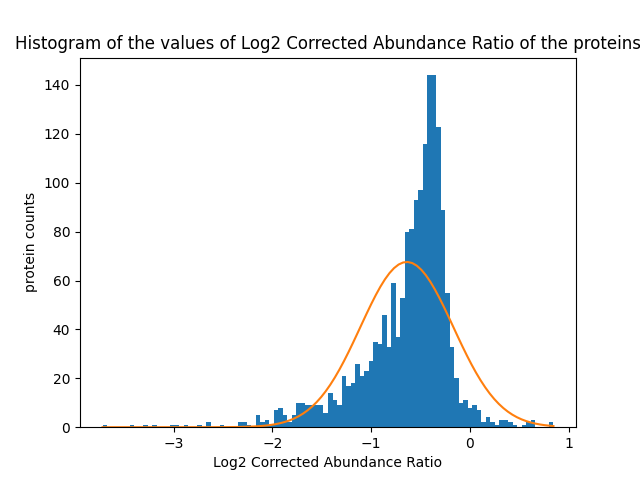

-0.63862621564433 0.47062451611275274


In [42]:
# histogramme les valeurs de Log2 Corrected Abundance Ratio
import numpy as np
from math import sqrt
'''
fig, ax = plt.sublplots()
log2_abratio = tcl['Log2 Corrected Abundance Ratio'].tolist()
ax.hist(log2_abratio, bins=n_bins)
'''
fig, ax = plt.subplots()
log2_abratio = tcl['Log2 Corrected Abundance Ratio'].tolist()
hist = ax.hist(log2_abratio, bins=100) # draw histogram
mu = np.mean(log2_abratio)
S_2 = np.std(log2_abratio)
print(mu,S_2)


x = np.linspace(min(log2_abratio), max(log2_abratio), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(log2_abratio)*dx # scale accordingly
ax.plot(x, norm.pdf(x, mu, S_2)*scale) # compute theoritical PDF and draw it
ax.set_xlabel('Log2 Corrected Abundance Ratio')
ax.set_ylabel('protein counts')
ax.set_title('Histogram of the values of Log2 Corrected Abundance Ratio of the proteins')
fig.savefig('histogram_log2FC.png')

